# 5.3.2 Anisotropic Model Results in the Frequency Domain

Numerical examples of the book  

### Introduction to Controlled-Source Electromagnetic Methods  
Anton Ziolkowski and Evert Slob, 2019, *Cambridge University Press*; ISBN: [9781107058620](https://www.cambridge.org/9781107058620).

- - -
Copyright 2018 Dieter Werthmüller

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0). Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
import numpy as np
import empymod as epm
import matplotlib.pyplot as plt

%matplotlib inline

def phase(inp):
    """Shortcut for -np.unwrap(np.angle())."""
    return -np.unwrap(np.angle(inp))

## Calculation

### General model parameters

In [2]:
# Offsets
x = np.linspace(10, 1.5e4, 128)
px = x/1000  # x for plotting

# Resistivity models
rtg = [2e14, 1/3, 1, 70, 1]  # With target
rhs = [2e14, 1/3, 1, 1, 1]   # Half-space

# Common model parameters (deep sea parameters)
model = {'src': [0, 0, 975],              # Source location
         'rec': [x, x*0, 1000],           # Receiver location
         'freqtime': 0.5,                 # Frequencies
         'aniso': [1, 1, np.sqrt(2), np.sqrt(2), np.sqrt(2)],  # Anisotropy
         'depth': [0, 1000, 2000, 2040],  # Depths
         'verb': 1}                       # Verbosity

### Calculate deep sea model

- water depth of 1000 m
- source depth 975 m
- receiver depth 1000 m

In [3]:
# With reservoir
target = epm.dipole(res=rtg, **model)

# Without reservoir
notarg = epm.dipole(res=rhs, **model)

### Calculate shallow model; deep src/rec

- water depth of 100 m
- source depth 75 m
- receiver depth 100 m

In [4]:
# Adjust depths, source, and receiver
model['depth'] = [0, 100, 1100, 1140]

# Deep source, receiver on sea bottom
model['src'][2] = 75
model['rec'][2] = 100

# With reservoir
sdtarget = epm.dipole(res=rtg, **model)

# Without reservoir
sdnotarg = epm.dipole(res=rhs, **model)

### Calculate shallow model; shallow src/rec

- water depth of 100 m
- source depth 10 m
- receiver depth 50 m

In [5]:
# Shallow source and streamer
model['src'][2] = 10
model['rec'][2] = 50

# With reservoir
sstarget = epm.dipole(res=rtg, **model)

# Without reservoir
ssnotarg = epm.dipole(res=rhs, **model)

### Plot settings

In [6]:
def set_axis():
    """Common axis setting."""
    plt.xlabel('Offset (km)')
    plt.xlim([0, 15])
    plt.xticks([0, 5, 10, 15])
    if np.any(plt.gca().get_legend_handles_labels()):
        plt.legend()
    
    
def thin_y_ticks():
    """Hide every second y-tick label."""
    for label in plt.gca().get_yticklabels()[::2]:
        label.set_visible(False)

## Figure 5.25

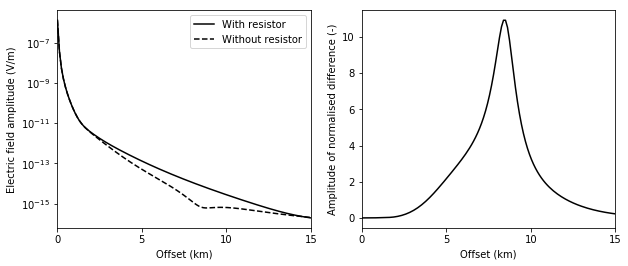

In [7]:
plt.figure(figsize=(10, 4))

# 1st subplot
plt.subplot(121)
plt.semilogy(px, np.abs(target), 'k-', label='With resistor')
plt.semilogy(px, np.abs(notarg), 'k--', label='Without resistor')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()

# 2nd subplot
plt.subplot(122)
ndiff = np.abs((target-notarg)/notarg)
plt.plot(px, ndiff, 'k-')
plt.ylabel('Amplitude of normalised difference (-)')
set_axis()

plt.show()

Figure 5.25 Electric field amplitudes (left) and amplitude of the normalised difference (right) in the VTI model with $\lambda$ = $\sqrt{2}$ except for the sea layer that is isotropic.

## Figure 5.26

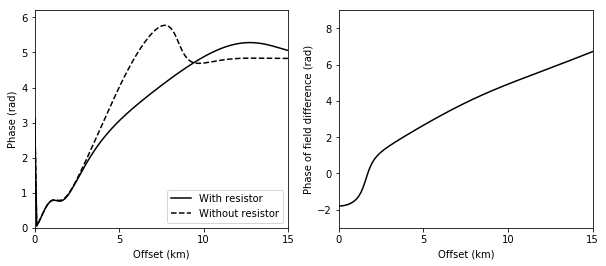

In [8]:
plt.figure(figsize=(10, 4))

# 1st subplot
plt.subplot(121)
plt.plot(px, phase(target), 'k-', label='With resistor')
plt.plot(px, phase(notarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, 6.2])

# 2nd subplot
plt.subplot(122)
plt.plot(px, phase(target-notarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9])

plt.show()

Figure 5.26 Electric field phases (left) and the phase of the difference in the fields (right).

## Figure 5.27

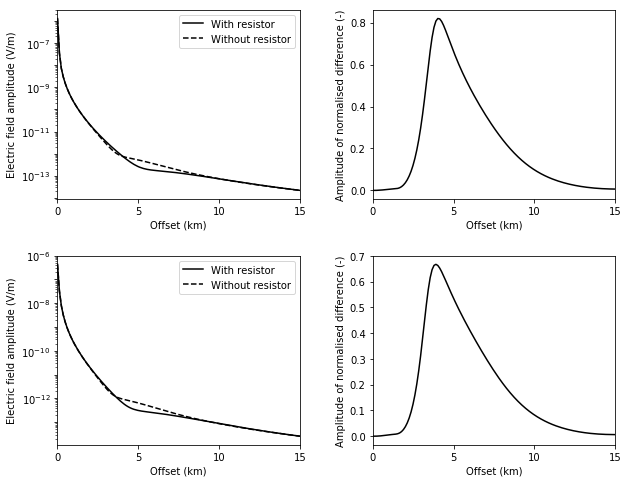

In [9]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.3)

# 1st subplot
plt.subplot(221)
plt.semilogy(px, np.abs(sdtarget), 'k-', label='With resistor')
plt.semilogy(px, np.abs(sdnotarg), 'k--', label='Without resistor')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
thin_y_ticks()

# 2nd subplot
plt.subplot(222)
ndiff1 = np.abs((sdtarget-sdnotarg)/sdnotarg)
plt.plot(px, ndiff1, 'k-')
plt.ylabel('Amplitude of normalised difference (-)')
set_axis()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])

# 3rd subplot
plt.subplot(223)
plt.semilogy(px, np.abs(sstarget), 'k-', label='With resistor')
plt.semilogy(px, np.abs(ssnotarg), 'k--', label='Without resistor')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
thin_y_ticks()

# 4th subplot
plt.subplot(224)
ndiff2 = np.abs((sstarget-ssnotarg)/ssnotarg)
plt.plot(px, ndiff2, 'k-')
plt.ylabel('Amplitude of normalised difference (-)')
set_axis()

plt.show()

Figure 5.27 Electric field amplitudes (left) and amplitude of the normalised difference (right) for the deep source and sea-floor receivers (top) and shallow sources and towed receivers (bottom) in the VTI model with $\lambda$ = $\sqrt{2}$ except for the sea layer that is isotropic.

## Figure 5.28

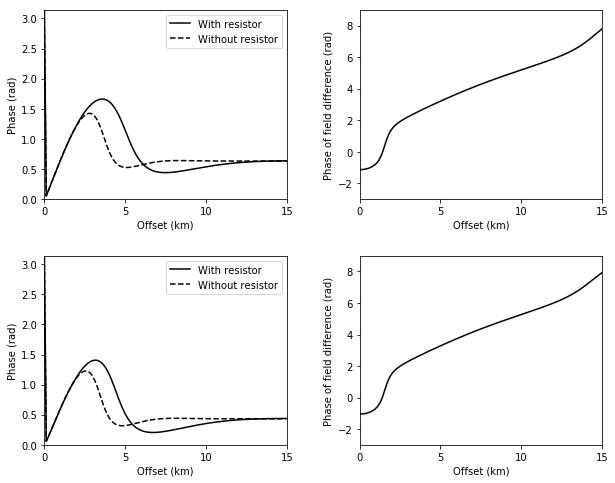

In [10]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.3)

# 1st subplot
plt.subplot(221)
plt.plot(px, phase(sdtarget), 'k-', label='With resistor')
plt.plot(px, phase(sdnotarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, np.pi])

# 2nd subplot
plt.subplot(222)
plt.plot(px, phase(sdtarget-sdnotarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9])

# 3rd subplot
plt.subplot(223)
plt.plot(px, phase(sstarget), 'k-', label='With resistor')
plt.plot(px, phase(ssnotarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, np.pi])

# 4th subplot
plt.subplot(224)
plt.plot(px, phase(sstarget-ssnotarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9])

plt.show()

Figure 5.28 Electric field phases (left) and the phase of the difference in the fields (right) for the deep source and sea-floor receivers (top) and shallow sources and towed receivers (bottom).

In [11]:
epm.versions('HTML')